# Demo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import os
from tqdm import tqdm
import imageio
import cv2
from itertools import product
import shutil
import multiprocess as mp

sys.path.append("./utils")
from myUtils import mkdir
from caUtils import plot_simulation, simulate_well
from OnLatticeModel import OnLatticeModel

# Format plots
sns.set(style="white",
        font_scale=2.,
        font="Serif",
        rc={'figure.figsize':(12,6)})

In [8]:
### Script parameters
runCASimulations = True # Whether to run the CA simulations to generate the data analysed in this script
jarFileName = "./code.jar"
palette_sensitiveResistant = {"S":"#0F4C13", "R":"#710303"}

## Example simulation for n0 = 0.10 and fR = 0.10

In [24]:
# Params
initialSize = 250
rFrac = 0.1
turnover = 0
cost = 0
nReplicates = 3
tEnd = 10
measurementFrequency = 1
seedToShowImagesFor = 0
dataDir = "./data/exampleSims/data/"
imgDir = "./data/exampleSims/images/"

### Simulate

In [25]:
# Collect the data for the time series plots showing the treatment dynamics avaraged across nReplicate simulations
# if runCASimulations:
modelConfigDic = {"initialSize":initialSize,"rFrac":rFrac,
#                   "turnover":turnover,"cost":cost,
                  "tEnd":tEnd,"nReplicates":nReplicates,
                  "outDir":dataDir}
myModel = OnLatticeModel(jarFileName = jarFileName, **modelConfigDic)
myModel.RunSimulation()

In [26]:
# Collect the images for one replicate
# if runCASimulations:
modelConfigDic = {"initialSize":initialSize,"rFrac":rFrac,
#                       "turnover":turnover,"cost":cost,
                  "tEnd":tEnd,"seed":seedToShowImagesFor,"nReplicates":1,
                  "imageOutDir":imgDir,"imageFrequency":1,
                  "outDir":"./data/scratch/"}
myModel = OnLatticeModel(jarFileName = jarFileName, **modelConfigDic)
myModel.RunSimulation()

### Plot the simulations

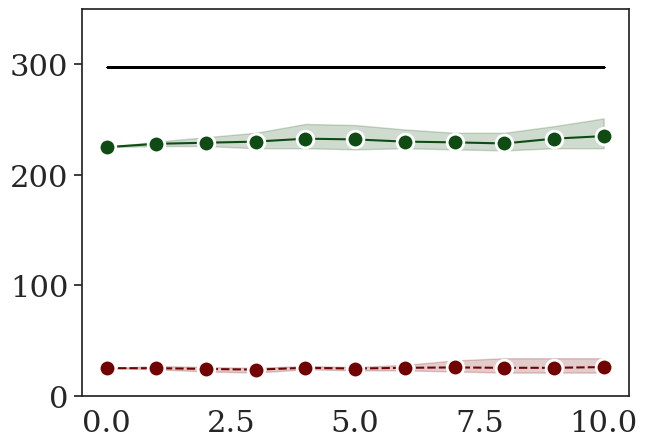

In [20]:
dataDf = load_data(dataDir=dataDir, nReplicates=nReplicates, measurementFrequency=measurementFrequency)
plot_simulation(dataDf=dataDf, feature='Confluence',
         hue="CellType", style="CellType", palette=palette_sensitiveResistant, ylim=350, figsize=(7,5))

### Plot Images

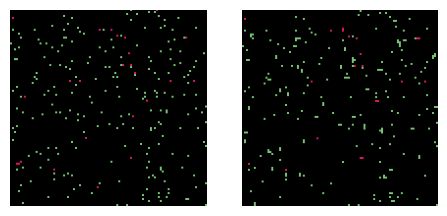

In [28]:
timePointList = [0,tEnd]

fig,axList = plt.subplots(1,2,figsize=(5,5))
for i,timePoint in enumerate(timePointList):
    # Load image
    currImgDir = os.path.join(imgDir,"RepId_%d/"%(seedToShowImagesFor))
    currImg = cv2.imread(os.path.join(currImgDir,"img_t_%.1f.png"%(float(timePoint))))
    currImg = cv2.cvtColor(currImg, cv2.COLOR_BGR2RGB)

    ax = axList[i]
    ax.imshow(currImg)
    ax.axis('off')
plt.tight_layout()
# plt.savefig("figures/exampleSim_noCost_noTurnover_images.pdf")

### Make gif

In [15]:
timePointList = np.arange(0,tEnd+measurementFrequency,measurementFrequency)
rFracList_toPlot = rFracList[::2]
images = []

for timePoint in timePointList:
    fig,axList = plt.subplots(1,len(rFracList_toPlot),figsize=(35,5))
    for j,rFrac in enumerate(rFracList_toPlot):
        # Load image
        currImgDir = os.path.join(imgDir,"rFrac_%1.2f/RepId_%d/"%(rFrac,seedToShowImagesFor))
        currImg = cv2.imread(os.path.join(currImgDir,"img_t_%.1f.png"%(float(timePoint))))
        currImg = cv2.cvtColor(currImg, cv2.COLOR_BGR2RGB)

        currAx = axList[j]
        currAx.imshow(currImg)
        currAx.axis('off')
    plt.tight_layout()
    # Convert images to png so can use gif maker
    plt.savefig(os.path.join(imgDir,"t_%.1f.png"%(float(timePoint))))
    currImg = cv2.imread(os.path.join(imgDir,"t_%.1f.png"%(float(timePoint))))
    currImg = cv2.cvtColor(currImg, cv2.COLOR_BGR2RGB)
    images.append(currImg)
    plt.close()
imageio.mimsave("test.gif", images, duration=.25)
# plt.savefig("figures/exampleSim_noCost_noTurnover_images.pdf")

## Example simulation with treatment

In [13]:
# Params
initialSize = 250
rFrac = 0.1
turnover = 0
cost = 0
nReplicates = 3
tEnd = 10
measurementFrequency = 1
seedToShowImagesFor = 0
treatmentScheduleList = [[0,3,0],[3,10,1],[10,15,0],[15,21,1]]
dataDir = "./data/exampleSims_withTreatment/data/"
imgDir = "./data/exampleSims_withTreatment/images/"

### Simulate

In [14]:
# Collect the data for the time series plots showing the treatment dynamics avaraged across nReplicate simulations
# if runCASimulations:
modelConfigDic = {"initialSize":initialSize,"rFrac":rFrac,
                  "tEnd":tEnd,"nReplicates":nReplicates,
                  "outDir":dataDir}
myModel = OnLatticeModel(jarFileName = jarFileName, **modelConfigDic)
myModel.Simulate(treatmentScheduleList=treatmentScheduleList)

In [15]:
# Collect the images for one replicate
# if runCASimulations:
modelConfigDic = {"initialSize":initialSize,"rFrac":rFrac,
#                       "turnover":turnover,"cost":cost,
                  "tEnd":tEnd,"seed":seedToShowImagesFor,"nReplicates":1,
                  "imageOutDir":"./imgs/","imageFrequency":1,
                  "outDir":"./data/scratch/"}
myModel = OnLatticeModel(jarFileName = jarFileName, **modelConfigDic)
myModel.Simulate(treatmentScheduleList=treatmentScheduleList)

### Plot the simulations

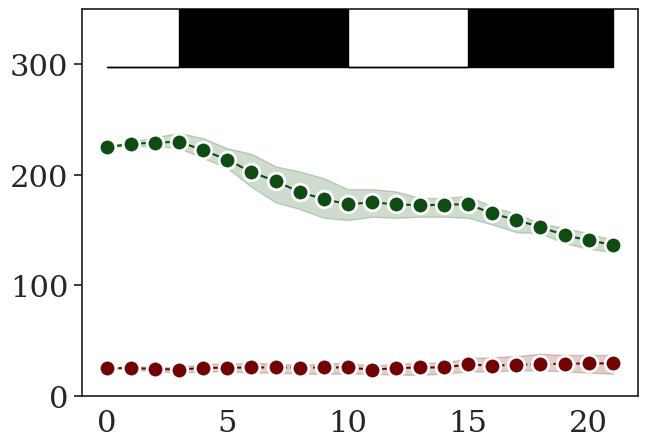

In [16]:
dataDf = load_data(dataDir=dataDir, nReplicates=nReplicates, measurementFrequency=measurementFrequency)
# plot_simulation(dataDf,plotIndividualTrajectories=False)
plot_simulation(dataDf=dataDf, feature='Confluence', treatmentScheduleList=treatmentScheduleList,
         hue="CellType", style="CellType", palette=palette_sensitiveResistant, ylim=350, figsize=(7,5))